# <center>Learning how to play Space Invaders with RL.</center>

![space invaders poster image](https://cdn-images-1.medium.com/max/1200/1*Ya6drllhmC82yh0J-elrPA.jpeg)

In [1]:
import gym
import numpy as np
from utils.frameStack import FrameStack

k_frames = 4

env = gym.make('SpaceInvaders-v0')
env = FrameStack(env, k_frames)

**Observation space**: the observation space consists on 3 sequential images of size 210x160

**Action space**: there are 6 possible actions: *left, right, shoot, left-shoot, right-shoot, do nothing*.

In [2]:
print(env.observation_space.shape)
print(env.action_space)

(210, 160, 12)
Discrete(6)


### Agent acting randomly

In [3]:
# Example of how env works
total_reward = 0
env.reset()
while True:
    env.render()
    next_state, reward, done, info = env.step((env.action_space.sample())) # select random action
    total_reward += reward
    if done:
        print(total_reward)
        break
        
env.close()

425.0


### State sequence

Each state will look like a sequence of 4 frames. Every frame is cropped and preprocessed for faster and more efficient computations.

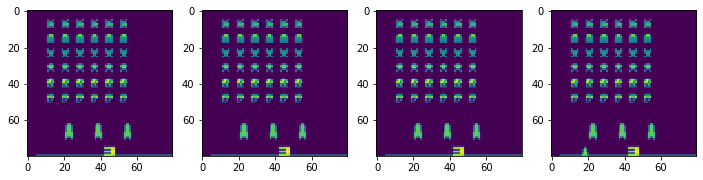

In [5]:
from dqn.model import Model
import matplotlib.pyplot as plt

env.reset()

# Create a new state
next_state, reward, done, info = env.step((env.action_space.sample())) # select random action
next_state = Model.frames_preprocessing(next_state)

# Plot the state
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
ax = axes.ravel()

for i, frame in enumerate(next_state.transpose(3, 1, 2, 0).squeeze()):
    ax[i].imshow(frame)

### Establishing a benchmark

I'll be using two benchmarks:
* The performance of an agent without training over 60 games
* The performance of a human

In [7]:
from dqn.train import Train 

episodes_eval = 60
benchmark = Train(env, episodes_eval, k_frames=4)

# Evaluate performance
benchmark.train(learn=True, render=True)

# Plot rewards
benchmark.plot_rewards()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


episode: 1, score: 55.0:   0%|          | 0/60 [00:03<?, ?it/s]

Instructions for updating:
Use tf.cast instead.


episode: 3, score: 125.0:   5%|▌         | 3/60 [00:21<06:50,  7.20s/it]

KeyboardInterrupt: 

## Training

In [6]:
episodes_train = 1000

train = Train(env, episodes_train = 1000, k_frames=4)

# Train the agent
train.train(learn=True, render=False)
# Plot rewards
train.plot_rewards()

NameError: name 'Train' is not defined